In [2]:
import cv2                                # state of the art computer vision algorithms library
import numpy as np                        # fundamental package for scientific computing
import matplotlib.pyplot as plt           # 2D plotting library producing publication quality figures
import pyrealsense2 as rs                 # Intel RealSense cross-platform open-source API
print("Environment Ready")


Environment Ready


In [16]:
# this script will first filter out the hand
# First import the library
import pyrealsense2 as rs
# Import Numpy for easy array manipulation
import numpy as np
# Import OpenCV for easy image rendering
import cv2

# Create a pipeline
pipeline = rs.pipeline()

#Create a config and configure the pipeline to stream
#  different resolutions of color and depth streams
config = rs.config()
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)

# Start streaming
profile = pipeline.start(config)

# Getting the depth sensor's depth scale (see rs-align example for explanation)
depth_sensor = profile.get_device().first_depth_sensor()
depth_scale = depth_sensor.get_depth_scale()
print("Depth Scale is: " , depth_scale)

# We will be removing the background of objects more than
#  clipping_distance_in_meters meters away
clipping_distance_in_meters = 1 #1 meter
clipping_distance = clipping_distance_in_meters / depth_scale

# Create an align object
# rs.align allows us to perform alignment of depth frames to others frames
# The "align_to" is the stream type to which we plan to align depth frames.
align_to = rs.stream.color
align = rs.align(align_to)

# Streaming loop
try:
    while True:
        # Get frameset of color and depth
        frames = pipeline.wait_for_frames()
        # frames.get_depth_frame() is a 640x360 depth image

        # Align the depth frame to color frame
        aligned_frames = align.process(frames)

        # Get aligned frames
        aligned_depth_frame = aligned_frames.get_depth_frame() # aligned_depth_frame is a 640x480 depth image
        color_frame = aligned_frames.get_color_frame()

        # Validate that both frames are valid
        if not aligned_depth_frame or not color_frame:
            continue

        depth_image = np.asanyarray(aligned_depth_frame.get_data())
        color_image = np.asanyarray(color_frame.get_data())

        colorizer = rs.colorizer()
        colorized_depth = np.asanyarray(colorizer.colorize(aligned_depth_frame).get_data())


        # Remove background - Set pixels further than clipping_distance to grey
        grey_color = 153
        depth_image_3d = np.dstack((depth_image,depth_image,depth_image)) #depth image is 1 channel, color is 3 channels
        bg_removed = np.where((depth_image_3d > clipping_distance) | (depth_image_3d <= 0), grey_color, color_image)

        # Render images
        depth_colormap = cv2.applyColorMap(cv2.convertScaleAbs(depth_image, alpha=0.03), cv2.COLORMAP_JET)
        images = np.hstack((bg_removed, depth_colormap))
        cv2.namedWindow('Align Example', cv2.WINDOW_AUTOSIZE)
        cv2.imshow('Align Example', colorized_depth)
        key = cv2.waitKey(1)
        # Press esc or 'q' to close the image window
        if key & 0xFF == ord('q') or key == 27:
            cv2.destroyAllWindows()
            break
finally:
    pipeline.stop()

Depth Scale is:  0.0010000000474974513


In [4]:
# this script will first filter out the hand
# First import the library
import pyrealsense2 as rs
# Import Numpy for easy array manipulation
import numpy as np
# Import OpenCV for easy image rendering
import cv2

# Create a pipeline
pipeline = rs.pipeline()

#Create a config and configure the pipeline to stream
#  different resolutions of color and depth streams
config = rs.config()
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)

# Start streaming
profile = pipeline.start(config)

# Getting the depth sensor's depth scale (see rs-align example for explanation)
depth_sensor = profile.get_device().first_depth_sensor()
depth_scale = depth_sensor.get_depth_scale()
print("Depth Scale is: " , depth_scale)

# We will be removing the background of objects more than
#  clipping_distance_in_meters meters away
clipping_distance_in_meters = 0.2 # 0.2 m
clipping_distance = clipping_distance_in_meters / depth_scale

# Create an align object
# rs.align allows us to perform alignment of depth frames to others frames
# The "align_to" is the stream type to which we plan to align depth frames.
align_to = rs.stream.color
align = rs.align(align_to)

# Streaming loop

# Get frameset of color and depth
frames = pipeline.wait_for_frames()
# frames.get_depth_frame() is a 640x360 depth image


# Align the depth frame to color frame
aligned_frames = align.process(frames)

# Get aligned frames
aligned_depth_frame = aligned_frames.get_depth_frame() # aligned_depth_frame is a 640x480 depth image
color_frame = aligned_frames.get_color_frame()

# Validate that both frames are valid
if not aligned_depth_frame or not color_frame:
    pass



Depth Scale is:  0.0010000000474974513


In [6]:
depth_image = np.asanyarray(aligned_depth_frame.get_data())
color_image = np.asanyarray(color_frame.get_data())
#         from numpy import savetxt

import matplotlib.pyplot as plt
image = cv2.imread("./tests/ok.png")
colorizer = rs.colorizer()
colorized_depth = np.asanyarray(colorizer.colorize(image).get_data())

plt.rcParams["axes.grid"] = False
plt.rcParams['figure.figsize'] = [8, 4]
plt.imshow(colorized_depth)
    
# find the closest pixel in the depth_image. 


TypeError: colorize(): incompatible function arguments. The following argument types are supported:
    1. (self: pyrealsense2.pyrealsense2.colorizer, depth: pyrealsense2.pyrealsense2.frame) -> pyrealsense2.pyrealsense2.video_frame

Invoked with: <pyrealsense2.pyrealsense2.colorizer object at 0x7f4e70839a30>, array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

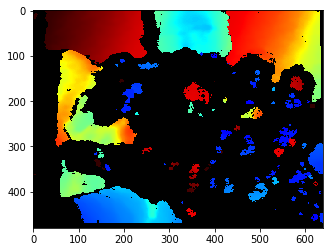

In [15]:
colorizer = rs.colorizer()
colorized_depth = np.asanyarray(colorizer.colorize(aligned_depth_frame).get_data())

plt.rcParams["axes.grid"] = False
plt.rcParams['figure.figsize'] = [8, 4]
plt.imshow(colorized_depth)

In [9]:
np.amax(depth_image)

52739

In [ ]:

# Remove background - Set pixels further than clipping_distance to grey
grey_color = 153
depth_image_3d = np.dstack((depth_image,depth_image,depth_image)) #depth image is 1 channel, color is 3 channels
bg_removed = np.where((depth_image_3d > clipping_distance) | (depth_image_3d <= 0), grey_color, color_image)

# Render images
depth_colormap = cv2.applyColorMap(cv2.convertScaleAbs(depth_image, alpha=0.03), cv2.COLORMAP_JET)
images = np.hstack((bg_removed, depth_colormap))
cv2.namedWindow('Align Example', cv2.WINDOW_AUTOSIZE)
cv2.imshow('Align Example', images)
key = cv2.waitKey(1)
# Press esc or 'q' to close the image window
if key & 0xFF == ord('q') or key == 27:
    cv2.destroyAllWindows()
    pass
pipeline.stop()